## 数据分析目标
- 构建零售商品的Apriori关联规则模型，分析商品之间的关联性。
- 根据模型结果给出销售策略。


## 数据探索分析
### 查看数据特征

In [51]:
import numpy as np
import pandas as pd

inputfile = 'data/GoodsOrder.csv'   # 输入的数据文件
data = pd.read_csv(inputfile,encoding = 'gbk')  # 读取数据
data.head()  # 查看数据属性

,id,Goods
0,1,柑橘类水果
1,1,人造黄油
2,1,即食汤
3,1,半成品面包
4,2,咖啡


In [40]:
data_id = data['id']
description = [data_id.count(),data_id.min(), data_id.max()]  # 依次计算总数、最小值、最大值
description = pd.DataFrame(description, index = ['Count','Min', 'Max']).T  # 将结果存入数据框

# np.round()对浮点数进行近似取值，保留几位小数
np.round(description)  # 输出结果

,Count,Min,Max
0,43367,1,9835


### 分析热销商品
#### 销量排行前10商品的销量及其占比

In [41]:
# 销量排行前10商品的销量及其占比
group = data.groupby(['Goods']).count().reset_index()  # 对商品进行分类汇总
group_sorted = group.sort_values('id',ascending=False)
group_sorted[:10]  # 排序并查看前10位热销商品

,Goods,id
7,全脂牛奶,2513
8,其他蔬菜,1903
155,面包卷,1809
134,苏打,1715
150,酸奶,1372
99,瓶装水,1087
70,根茎类蔬菜,1072
85,热带水果,1032
143,购物袋,969
160,香肠,924


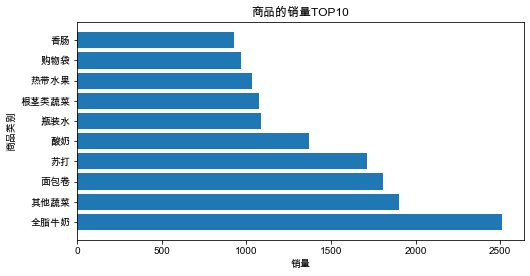

In [6]:
# 画条形图展示出销量排行前10商品的销量
import matplotlib.pyplot as plt
x=group_sorted[:10]['Goods']
y=group_sorted[:10]['id']
plt.figure(figsize = (8, 4))  # 设置画布大小 
plt.barh(x,y)
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
plt.xlabel('销量')  # 设置x轴标题
plt.ylabel('商品类别')  # 设置y轴标题
plt.title('商品的销量TOP10')  # 设置标题
plt.show()  # 展示图片

In [43]:
# 销量排行前10商品的销量占比
data_nums = data.shape[0]
for index, row in group_sorted[:10].iterrows():
    print(row['Goods'],row['id'],row['id']/data_nums)

全脂牛奶 2513 0.05794728710770863
其他蔬菜 1903 0.0438812922268084
面包卷 1809 0.04171374547466968
苏打 1715 0.039546198722530956
酸奶 1372 0.031636958978024765
瓶装水 1087 0.025065141697604168
根茎类蔬菜 1072 0.024719256577582033
热带水果 1032 0.023796896257523
购物袋 969 0.022344178753430026
香肠 924 0.021306523393363617


#### 各类别商品的销量及其占比

In [44]:
# 代码8-3 各类别商品的销量及其占比

types = pd.read_csv(inputfile2,encoding = 'gbk')  # 读入数据
sort_links = pd.merge(group_sorted,types)  # 合并两个datafreame 根据type

# 根据类别求和，每个商品类别的总量，并排序
sort_link = sort_links.groupby(['Types']).sum().reset_index()
sort_link = sort_link.sort_values('id',ascending = False).reset_index()
del sort_link['index']  # 删除“index”列

# 求百分比，然后更换列名，最后输出到文件
sort_link['count'] = sort_link.apply(lambda line: line['id']/data_nums,axis=1)
sort_link.rename(columns = {'count':'percent'},inplace = True)
sort_link

,Types,id,percent
0,非酒精饮料,7594,0.175110
1,西点,7192,0.165840
2,果蔬,7146,0.164780
3,米粮调料,5185,0.119561
4,百货,5141,0.118546
5,肉类,4870,0.112297
6,酒精饮料,2287,0.052736
7,食品类,1870,0.043120
8,零食,1459,0.033643
9,熟食,541,0.012475


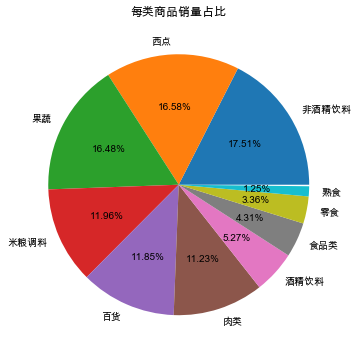

In [25]:
# 画饼图展示每类商品销量占比
data = sort_link['percent']
labels = sort_link['Types']
plt.figure(figsize=(8, 6))  # 设置画布大小   
plt.pie(data,labels=labels,autopct='%1.2f%%')
plt.title('每类商品销量占比')  # 设置标题
# plt.savefig('../tmp/persent.png')  # 把图片以.png格式保存
plt.show()

#### 非酒精饮料内部商品的销量及其占比

In [33]:
# 代码8-4 非酒精饮料内部商品的销量及其占比

# 先筛选“非酒精饮料”类型的商品，然后求百分比，然后输出结果到文件。
selected = sort_links.loc[sort_links['Types'] == '非酒精饮料']  # 挑选商品类别为“非酒精饮料”并排序
child_nums = selected['id'].sum()  # 对所有的“非酒精饮料”求和
selected['child_percent'] = selected.apply(lambda line: line['id']/child_nums,axis = 1)  # 求百分比
selected.rename(columns = {'id':'count'},inplace = True)
pd.set_option('mode.chained_assignment', None) # 不显示警告信息
selected

,Goods,count,Types,child_percent
0,全脂牛奶,2513,非酒精饮料,0.330919
3,苏打,1715,非酒精饮料,0.225836
5,瓶装水,1087,非酒精饮料,0.143139
16,水果/蔬菜汁,711,非酒精饮料,0.093627
22,咖啡,571,非酒精饮料,0.075191
38,超高温杀菌的牛奶,329,非酒精饮料,0.043324
45,其他饮料,279,非酒精饮料,0.036740
51,一般饮料,256,非酒精饮料,0.033711
101,速溶咖啡,73,非酒精饮料,0.009613
125,茶,38,非酒精饮料,0.005004


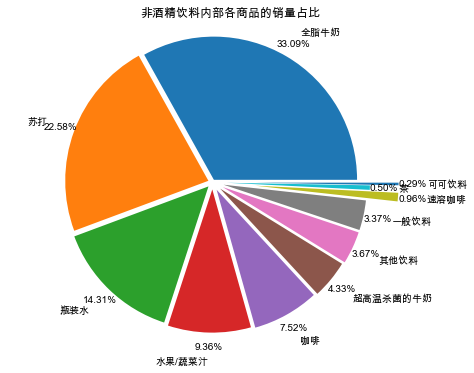

In [45]:
# 画饼图展示非酒精饮品内部各商品的销量占比
data = selected['child_percent']
labels = selected['Goods']
plt.figure(figsize = (8,6))  # 设置画布大小 
explode = (0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.08,0.3,0.1,0.3)  # 设置每一块分割出的间隙大小
plt.pie(data,explode = explode,labels = labels,autopct = '%1.2f%%',
        pctdistance = 1.1,labeldistance = 1.2)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("非酒精饮料内部各商品的销量占比")  # 设置标题
plt.axis('equal')
# plt.savefig('../tmp/child_persent.png')  # 保存图形
plt.show()  # 展示图形

## 关联规则分析

In [52]:
# 拿到需要建模的list数据，数据转换
# 根据id对“Goods”列合并，并使用“，”将各商品隔开
data['Goods'] = data['Goods'].apply(lambda x:','+x)

# 将字符串进行求和相加在一起
data = data.groupby('id').sum().reset_index()

# 对合并的商品列转换数据格式
data['Goods'] = data['Goods'].apply(lambda x :[x[1:]])
data_list = list(data['Goods'])

## 分割商品名为每个元素
# 创建一个空列表
data_translation = []
for i in data_list:
    p = i[0].split(',') # 从i的第1个列表元素开始，用","进行分割
    data_translation.append(p)
关联分析[0:5]

[['柑橘类水果', '人造黄油', '即食汤', '半成品面包'],
 ['咖啡', '热带水果', '酸奶'],
 ['全脂牛奶'],
 ['奶油乳酪', '肉泥', '仁果类水果', '酸奶'],
 ['炼乳', '长面包', '其他蔬菜', '全脂牛奶']]

### 方式一：写算法流程

In [53]:
### 方式一
from numpy import *
 
def loadDataSet():
    return [['a', 'c', 'e'], ['b', 'd'], ['b', 'c'], ['a', 'b', 'c', 'd'], ['a', 'b'], ['b', 'c'], ['a', 'b'],
            ['a', 'b', 'c', 'e'], ['a', 'b', 'c'], ['a', 'c', 'e']]
 
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    # 映射为frozenset唯一性的，可使用其构造字典
    return list(map(frozenset, C1))     
    
# 从候选K项集到频繁K项集（支持度计算）
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:   # 遍历数据集
        for can in Ck:  # 遍历候选项
            if can.issubset(tid):  # 判断候选项中是否含数据集的各项
                if not can in ssCnt:
                    ssCnt[can] = 1  # 不含设为1
                else:
                    ssCnt[can] += 1  # 有则计数加1
    numItems = float(len(D))  # 数据集大小
    retList = []  # L1初始化
    supportData = {}  # 记录候选项中各个数据的支持度
    for key in ssCnt:
        support = ssCnt[key] / numItems  # 计算支持度
        if support >= minSupport:
            retList.insert(0, key)  # 满足条件加入L1中
            supportData[key] = support  
    return retList, supportData
 
def calSupport(D, Ck, min_support):
    dict_sup = {}
    for i in D:
        for j in Ck:
            if j.issubset(i):
                if not j in dict_sup:
                    dict_sup[j] = 1
                else:
                    dict_sup[j] += 1
    sumCount = float(len(D))
    supportData = {}
    relist = []
    for i in dict_sup:
        temp_sup = dict_sup[i] / sumCount
        if temp_sup >= min_support:
            relist.append(i)
# 此处可设置返回全部的支持度数据（或者频繁项集的支持度数据）
            supportData[i] = temp_sup
    return relist, supportData
 
# 改进剪枝算法
def aprioriGen(Lk, k):
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):  # 两两组合遍历
            L1 = list(Lk[i])[:k - 2]
            L2 = list(Lk[j])[:k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:  # 前k-1项相等，则可相乘，这样可防止重复项出现
                # 进行剪枝（a1为k项集中的一个元素，b为它的所有k-1项子集）
                a = Lk[i] | Lk[j]  # a为frozenset()集合
                a1 = list(a)
                b = []
                # 遍历取出每一个元素，转换为set，依次从a1中剔除该元素，并加入到b中
                for q in range(len(a1)):
                    t = [a1[q]]
                    tt = frozenset(set(a1) - set(t))
                    b.append(tt)
                t = 0
                for w in b:
                    # 当b（即所有k-1项子集）都是Lk（频繁的）的子集，则保留，否则删除。
                    if w in Lk:
                        t += 1
                if t == len(b):
                    retList.append(b[0] | b[1])
    return retList

def apriori(dataSet, minSupport=0.2):
# 前3条语句是对计算查找单个元素中的频繁项集
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))  # 使用list()转换为列表
    L1, supportData = calSupport(D, C1, minSupport)
    L = [L1]  # 加列表框，使得1项集为一个单独元素
    k = 2
    while (len(L[k - 2]) > 0):  # 是否还有候选集
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = scanD(D, Ck, minSupport)  # scan DB to get Lk
        supportData.update(supK)  # 把supk的键值对添加到supportData里
        L.append(Lk)  # L最后一个值为空集
        k += 1
    del L[-1]  # 删除最后一个空集
    return L, supportData  # L为频繁项集，为一个列表，1，2，3项集分别为一个元素

# 生成集合的所有子集
def getSubset(fromList, toList):
    for i in range(len(fromList)):
        t = [fromList[i]]
        tt = frozenset(set(fromList) - set(t))
        if not tt in toList:
            toList.append(tt)
            tt = list(tt)
            if len(tt) > 1:
                getSubset(tt, toList)
 
def calcConf(freqSet, H, supportData, ruleList, minConf=0.7):
    for conseq in H:  #遍历H中的所有项集并计算它们的可信度值
        conf = supportData[freqSet] / supportData[freqSet - conseq]  # 可信度计算，结合支持度数据
        # 提升度lift计算lift = p(a & b) / p(a)*p(b)
        lift = supportData[freqSet] / (supportData[conseq] * supportData[freqSet - conseq])
 
        if conf >= minConf and lift > 1:
            print(freqSet - conseq, '-->', conseq, '支持度', round(supportData[freqSet], 6), '置信度：', round(conf, 6),
                  'lift值为：', round(lift, 6))
            ruleList.append((freqSet - conseq, conseq, conf))
 
# 生成规则
def gen_rule(L, supportData, minConf = 0.7):
    bigRuleList = []
    for i in range(1, len(L)):  # 从二项集开始计算
        for freqSet in L[i]:  # freqSet为所有的k项集
            # 求该三项集的所有非空子集，1项集，2项集，直到k-1项集，用H1表示，为list类型,里面为frozenset类型，
            H1 = list(freqSet)
            all_subset = []
            getSubset(H1, all_subset)  # 生成所有的子集
            calcConf(freqSet, all_subset, supportData, bigRuleList, minConf)
    return bigRuleList
 
if __name__ == '__main__':
    dataSet = data_translation
    L, supportData = apriori(dataSet, minSupport = 0.02)
    rule = gen_rule(L, supportData, minConf = 0.35)

frozenset({'水果/蔬菜汁'}) --> frozenset({'全脂牛奶'}) 支持度 0.02664 置信度： 0.368495 lift值为： 1.44216
frozenset({'人造黄油'}) --> frozenset({'全脂牛奶'}) 支持度 0.024199 置信度： 0.413194 lift值为： 1.617098
frozenset({'仁果类水果'}) --> frozenset({'全脂牛奶'}) 支持度 0.030097 置信度： 0.397849 lift值为： 1.557043
frozenset({'牛肉'}) --> frozenset({'全脂牛奶'}) 支持度 0.021251 置信度： 0.405039 lift值为： 1.58518
frozenset({'冷冻蔬菜'}) --> frozenset({'全脂牛奶'}) 支持度 0.020437 置信度： 0.424947 lift值为： 1.663094
frozenset({'本地蛋类'}) --> frozenset({'其他蔬菜'}) 支持度 0.022267 置信度： 0.350962 lift值为： 1.813824
frozenset({'黄油'}) --> frozenset({'其他蔬菜'}) 支持度 0.020031 置信度： 0.361468 lift值为： 1.868122
frozenset({'本地蛋类'}) --> frozenset({'全脂牛奶'}) 支持度 0.029995 置信度： 0.472756 lift值为： 1.850203
frozenset({'黑面包'}) --> frozenset({'全脂牛奶'}) 支持度 0.025216 置信度： 0.388715 lift值为： 1.521293
frozenset({'糕点'}) --> frozenset({'全脂牛奶'}) 支持度 0.033249 置信度： 0.373714 lift值为： 1.462587
frozenset({'酸奶油'}) --> frozenset({'其他蔬菜'}) 支持度 0.028876 置信度： 0.402837 lift值为： 2.081924
frozenset({'猪肉'}) --> frozenset({'其他蔬菜'}

### 方式二：使用 `apyori`库

In [54]:
from apyori import apriori
min_supp = 0.02
min_conf = 0.35
min_lift = 0.0

# 结果一致
res = apriori(transactions=data_translation, min_support=min_supp, min_confidence=min_conf, min_lift=min_lift)
for rule in res:
    print(str(rule))

RelationRecord(items=frozenset({'全脂牛奶', '人造黄油'}), support=0.024199288256227757, ordered_statistics=[OrderedStatistic(items_base=frozenset({'人造黄油'}), items_add=frozenset({'全脂牛奶'}), confidence=0.4131944444444444, lift=1.6170980346641903)])
RelationRecord(items=frozenset({'全脂牛奶', '仁果类水果'}), support=0.030096593797661414, ordered_statistics=[OrderedStatistic(items_base=frozenset({'仁果类水果'}), items_add=frozenset({'全脂牛奶'}), confidence=0.3978494623655914, lift=1.5570431605115762)])
RelationRecord(items=frozenset({'全脂牛奶', '其他蔬菜'}), support=0.07483477376715811, ordered_statistics=[OrderedStatistic(items_base=frozenset({'其他蔬菜'}), items_add=frozenset({'全脂牛奶'}), confidence=0.38675775091960063, lift=1.5136340948246207)])
RelationRecord(items=frozenset({'全脂牛奶', '冷冻蔬菜'}), support=0.02043721403152008, ordered_statistics=[OrderedStatistic(items_base=frozenset({'冷冻蔬菜'}), items_add=frozenset({'全脂牛奶'}), confidence=0.4249471458773784, lift=1.6630939831691272)])
RelationRecord(items=frozenset({'全脂牛奶', '凝乳'}),

### 结果说明

分析结果说明，例如对其中4条进行分析：
1. 1）{'其他蔬菜'，'酸奶'}=>{'全脂牛奶'}支持度约为2.23%，置信度约为51.29%。说明同时购买酸奶、其他蔬菜和全脂牛奶这3种商品的概率达51.29%，而这种情况发生的可能性约为2.23%。2）
2. {'其他蔬菜'}=>{'全脂牛奶'}支持度最大约为7.48%，置信度约为38.68%。说明同时购买其他蔬菜和全脂牛奶这两种商品的概率达38.68%，而这种情况发生的可能性约为7.48%。3）
3. {'根茎类蔬菜'}=>{'全脂牛奶'}支持度约为4.89%，置信度约为44.87%。说明同时购买根茎类蔬菜和全脂牛奶这3种商品的概率达44.87%，而这种情况发生的可能性约为4.89%。4）
4. {'根茎类蔬菜'}=>{'其他蔬菜'}支持度约为4.74%，置信度约为43.47%。说明同时购买根茎类蔬菜和其他蔬菜这两种商品的概率达43.47%，而这种情况发生的可能性约为4.74%。